# EDA & Preprocessing
Project 2 - Malware Infection

Authors: Michele Benvenuto, Roberto Figueroa, Gustavo Mendez

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import (
    SelectKBest,
    f_classif
)
from sklearn.ensemble import ExtraTreesClassifier

# Own utils
from utils import reduce_memory_usage, get_dataset_dtypes, derivate_features

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%matplotlib inline

Loading datasets ...

In [2]:
# Set datatypes
dtypes, numerical_columns, categorical_columns = get_dataset_dtypes()

In [3]:
# Load large dataset
df = pd.read_csv('./datasets/train_preprocessed.csv', dtype=dtypes, index_col=[0])
# df_test = pd.read_csv('./datasets/test_preprocessed.csv', dtype=dtypes)

In [4]:
df = df.sample(frac=0.25)

In [5]:
print(f"Train dataset shape: {df.shape}")

Train dataset shape: (1916950, 70)


## Feature selection

We are going to test different ways to select best features.

### Univariate Selection

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
X = df.drop('HasDetections', axis=1, inplace=False)
y = df['HasDetections']
del df

In [8]:
fs = SelectKBest(score_func=f_classif, k=10)

In [9]:
X_selected = fs.fit(X, y)

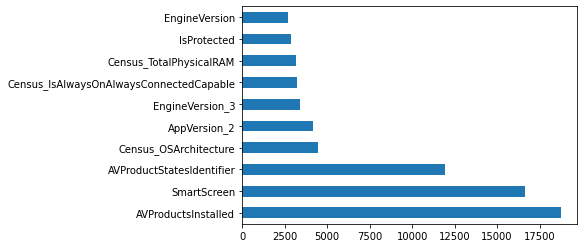

In [16]:
dfscores = pd.DataFrame(X_selected.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(10,'Score')
feat_importances = pd.Series(X_selected.scores_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Feature Importance

[6.39220601e-05 1.45276715e-02 1.04554831e-02 2.92022733e-04
 5.98375990e-03 3.94044800e-02 8.86437876e-03 1.11214999e-02
 1.37117222e-02 6.25185408e-03 1.39195745e-02 2.21001781e-02
 5.16679083e-03 7.90430203e-03 1.33456405e-02 2.44230458e-02
 1.50238968e-02 7.71348352e-03 1.40258956e-02 4.44072635e-03
 2.81732888e-03 2.32622764e-02 1.76902103e-02 2.72347163e-03
 2.80506022e-02 3.44900723e-02 2.61457183e-02 2.68746553e-02
 2.64108309e-02 6.52580170e-03 1.08498669e-02 2.23698497e-02
 2.81272363e-02 1.71350621e-02 2.93978991e-02 2.20349726e-02
 2.88357283e-02 2.16491667e-02 2.51271821e-02 2.01707803e-02
 1.39677708e-02 5.23994288e-03 2.20248989e-02 2.37775400e-02
 2.08486690e-02 3.01545244e-02 5.82259781e-03 2.05728908e-03
 2.38854544e-02 1.61898089e-03 3.22703698e-04 3.79026289e-03
 3.74169273e-03 7.56957059e-03 9.68955692e-03 2.54659065e-03
 8.24034924e-03 1.48328722e-02 8.34310114e-03 4.85643334e-03
 8.97535633e-03 9.42121941e-03 0.00000000e+00 0.00000000e+00
 5.64972446e-03 2.274791

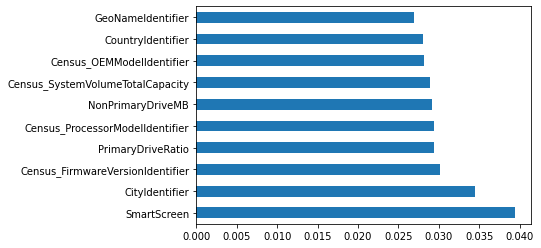

In [7]:
model = ExtraTreesClassifier(n_estimators=10, n_jobs=4)
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Most positive/negative correlated features with HasDetections

In [25]:
_corr = X.corrwith(y, axis = 0, method="kendall")

<AxesSubplot:>

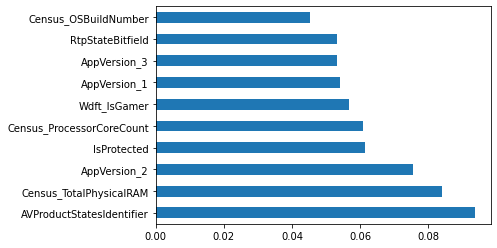

In [26]:
_corr.nlargest(10).plot(kind='barh')

<AxesSubplot:>

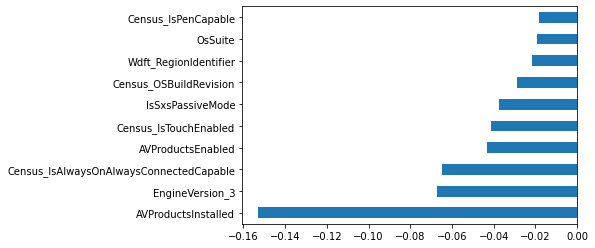

In [27]:
_corr.nsmallest(10).plot(kind='barh')